# 부산시 구별 CCTV 현황 분석하기

### 작성 : 구름9(urbansmart.xyz)

* `PinkWink`([블로그](http://pinkwink.kr))님의 저서 `파이썬으로 데이터 주무르기` 1장 `서울시 구별 CCTV 현황 분석`의 부산 버전
* 책, "파이썬으로 데이터 주무르기" 깃헙 저장소 : https://github.com/PinkWink/DataScience
* 행안부 "주민등록 인구 및 세대현황" : http://27.101.213.4/


In [26]:
import pandas as pd
import numpy as np

# 2019년 5월 기준 부산시 동별 인구수 현황 
pop_busan = pd.read_csv('../data/201905_201905_주민등록인구및세대현황_월간.csv', encoding='euc-kr')
pop_busan.head()

# 전체 총합 데이터 삭제
pop_busan.drop([0], axis=0, inplace=True)
pop_busan.head()

# 행정구역 컬럼 추가 
pop_busan['행정구'] = pop_busan['행정구역'].str.split(' ', n=2, expand=True)[1]
pop_busan.columns


,행정구역,2019년05월_총인구수,2019년05월_세대수,2019년05월_세대당 인구,2019년05월_남자 인구수,2019년05월_여자 인구수,2019년05월_남여 비율,행정구
1,부산광역시 중구 (2611000000),"42,404","23,037",1.84,"20,842","21,562",0.97,중구
2,부산광역시 서구 (2614000000),"109,820","53,055",2.07,"53,469","56,351",0.95,서구
3,부산광역시 동구 (2617000000),"86,347","43,356",1.99,"42,557","43,790",0.97,동구
4,부산광역시 영도구 (2620000000),"118,790","55,197",2.15,"58,680","60,110",0.98,영도구
5,부산광역시 부산진구 (2623000000),"358,815","165,287",2.17,"174,251","184,564",0.94,부산진구
6,부산광역시 동래구 (2626000000),"267,572","109,791",2.44,"130,703","136,869",0.95,동래구
7,부산광역시 남구 (2629000000),"278,632","118,283",2.36,"136,689","141,943",0.96,남구
8,부산광역시 북구 (2632000000),"293,362","119,648",2.45,"145,440","147,922",0.98,북구
9,부산광역시 해운대구 (2635000000),"408,026","167,782",2.43,"196,965","211,061",0.93,해운대구
10,부산광역시 사하구 (2638000000),"324,661","138,744",2.34,"162,086","162,575",1.00,사하구


In [31]:

# 추가한 컬럼 '행정구'가 가장 먼저 오도록 변경. 
# 기존 행정구역은 삭제 
pop_busan.drop(columns=['행정구역'], axis=1, inplace=True)


In [35]:
pop_busan.columns.values
cols = list(pop_busan.columns)
cols.insert(0, cols.pop(cols.index('행정구')))
pop_busan2 = pop_busan.ix[:,cols]


c:\users\rov\anaconda3\envs\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [43]:
pop_busan2


,행정구,2019년05월_총인구수,2019년05월_세대수,2019년05월_세대당 인구,2019년05월_남자 인구수,2019년05월_여자 인구수,2019년05월_남여 비율
1,중구,"42,404","23,037",1.84,"20,842","21,562",0.97
2,서구,"109,820","53,055",2.07,"53,469","56,351",0.95
3,동구,"86,347","43,356",1.99,"42,557","43,790",0.97
4,영도구,"118,790","55,197",2.15,"58,680","60,110",0.98
5,부산진구,"358,815","165,287",2.17,"174,251","184,564",0.94
6,동래구,"267,572","109,791",2.44,"130,703","136,869",0.95
7,남구,"278,632","118,283",2.36,"136,689","141,943",0.96
8,북구,"293,362","119,648",2.45,"145,440","147,922",0.98
9,해운대구,"408,026","167,782",2.43,"196,965","211,061",0.93
10,사하구,"324,661","138,744",2.34,"162,086","162,575",1.00


['NanumGothic']


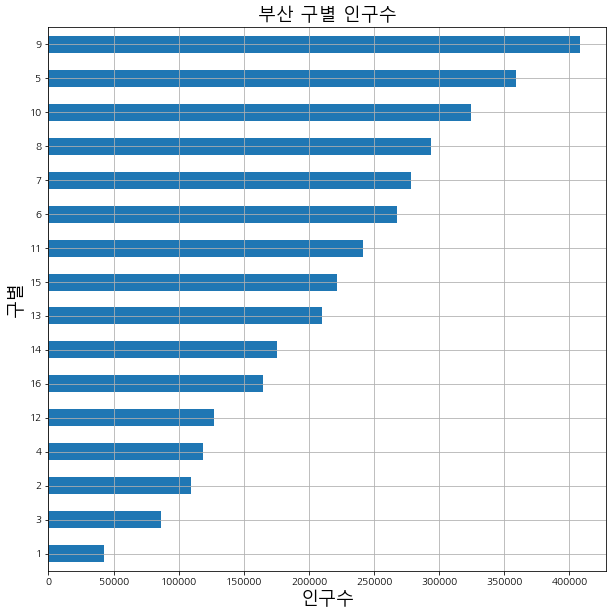

In [83]:
# pop_busan2['2019년05월_총인구수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

# TypeError: Empty 'DataFrame': no numeric data to plot
# 인수구 콤마 포함 문자열을 숫자 타임으로 변경 

pop_busan2['2019년05월_총인구수'] = pop_busan2['2019년05월_총인구수'].replace('\,', '', regex=True).astype(float)


In [105]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


['NanumGothic']


KeyError: '행정구'

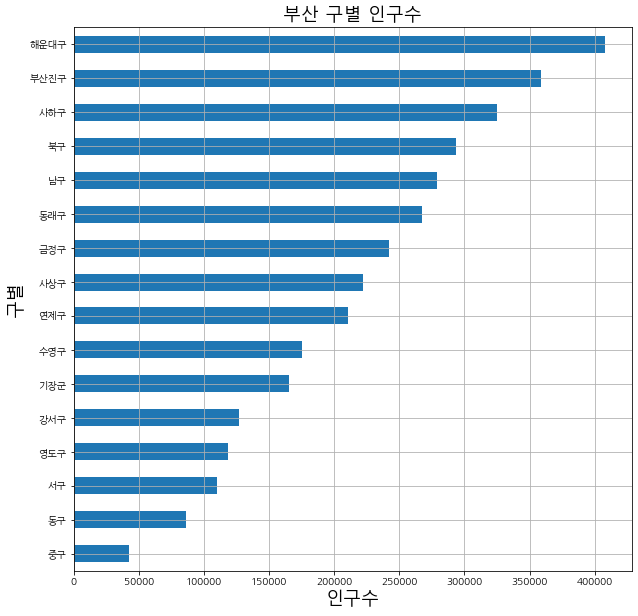

In [107]:
# pop_busan2.set_index("행정구", inplace=True, drop=True)
pop_busan2['2019년05월_총인구수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title("부산 구별 인구수", fontproperties=fontprop)
plt.ylabel("구별", fontproperties=fontprop)
plt.xlabel("인구수", fontproperties=fontprop)
plt.show()

,행정구,2019년05월_총인구수,2019년05월_세대수,2019년05월_세대당 인구,2019년05월_남자 인구수,2019년05월_여자 인구수,2019년05월_남여 비율
1,중구,42404.0,"23,037",1.84,"20,842","21,562",0.97
2,서구,109820.0,"53,055",2.07,"53,469","56,351",0.95
3,동구,86347.0,"43,356",1.99,"42,557","43,790",0.97
4,영도구,118790.0,"55,197",2.15,"58,680","60,110",0.98
5,부산진구,358815.0,"165,287",2.17,"174,251","184,564",0.94
6,동래구,267572.0,"109,791",2.44,"130,703","136,869",0.95
7,남구,278632.0,"118,283",2.36,"136,689","141,943",0.96
8,북구,293362.0,"119,648",2.45,"145,440","147,922",0.98
9,해운대구,408026.0,"167,782",2.43,"196,965","211,061",0.93
10,사하구,324661.0,"138,744",2.34,"162,086","162,575",1.00
